# Coursework
# SPCE0038: Machine Learning with Big-Data

---

## Overview

This coursework is provided as a Jupyter notebook, which you will need to complete.  

Throughout the notebook you will need to complete code, analytic exercises (if equations are required please typeset your solutions using latex in the markdown cell provided) and descriptive answers. Much of the grading of the coursework will be performed automatically, so it is critical you name your variables as requested.

Before you turn this coursework in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says "YOUR ANSWER HERE" or `YOUR CODE HERE` and remove remove the `raise NotImplementedError()` exceptions that are thrown before you have added your answers.

Please also:
- Make sure you use a python environment using the `requirements.txt` files provided by the course.
- Make sure your notebook executes without errors.
- Do not add and remove cells but only provide your answers in the spaces given.
- Do not add or change code in the cells other than the ones marked with `# YOUR CODE HERE`.
- Do not overwrite or rename any existing variables.
- Do not install code or packages in the notebooks.
- Do not import any libraries other than modules from `sklearn`.
- Always label your plots.
- Answer the questions concisely and show your work/derivations/reasoning.

**Please rename the notebook filename to include your candidate number in the filename.  And please also add your candidate number below:**

In [ ]:
CANDIDATE_NUMBER = ""

You will be able to run some basic tests in the notebook to check the basic operation of your code is as expected.  Although do not assume your responses are complete or fully correct just because the basic tests pass.

Once you have renamed the notebook file and completed the exercises, please upload the notebook to Moodle.


---

## AstroML

The data used is this coursework is obtained using [AstroML](http://www.astroml.org), a python package for machine learning for astronomy.  Although we take data from AstroML, this coursework is not based on standard AstroML examples.  So you will *not* find the solutions in AstroML examples!

## SDSS

The data obtained through AstroML was observed by the [Sloan Digital Sky Survey](https://www.sdss.org/) (SDSS), which began observations in 2000.  SDSS data have lead to many scientific advances and the experiment is widely seen as one of the most successful surveys in the history of astronomy.

---

## Dependencies

- Standard course dependencies (e.g. numpy, scikit-learn, etc.)
- [AstoML](http://www.astroml.org)
- [AstroPy](http://www.astropy.org/)

---

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
def check_var_defined(var):
    try:
        exec(var)
    except NameError:
        raise NameError(var + " not defined.")
    else:
        print(var + " defined.")

## Part 1: Regression

In these exercises we will consider the regression problem of the astonomical distance modulus vs redshift relationship.

In astronomy, the [distance modulus](https://en.wikipedia.org/wiki/Distance_modulus) specifies the difference between the apparent and absolute magnitudes of an astronomnical object.  It provides a way of expressing astrophysical distances. 

Astronomical [redshift](https://en.wikipedia.org/wiki/Redshift) specifies the shift in wavelength that astronomical objects undergo due to the expansion of the Universe.  Due to Hubble's Law, more distance objects experience a greater redshift.


In [20]:
from astroML.datasets import generate_mu_z

In [21]:
# Load data
m = 150
z_sample, mu_sample, dmu = generate_mu_z(m, random_state=3)

*Plot the distance modulus ($\mu$) vs redhift ($z$), including error bars.*

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
C:\Users\User\AppData\Local\Temp\ipykernel_31044\1707876195.py:7: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('$\mu$')


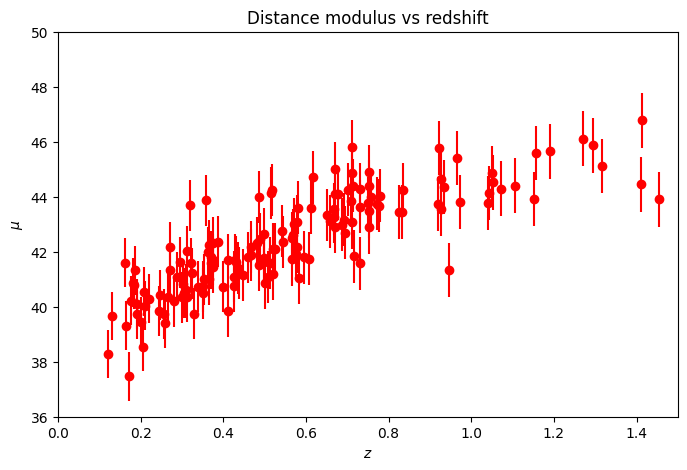

In [23]:
# Plot data
def plot_dist_mod():
    # YOUR CODE HERE
    plt.figure(figsize=(8, 5))
    plt.errorbar(z_sample, mu_sample, yerr=dmu, fmt="o", color="red", label="Data")
    plt.xlabel("$z$")
    plt.ylabel("$\mu$")
    plt.title("Distance modulus vs redshift")
    plt.ylim(36, 50)
    plt.xlim(0, 1.5)


plot_dist_mod()

Recall the normal equations for linear regression follow by analytically minimising the cost function: 

$$\min_\theta\ C(\theta) = \min_\theta \ (X \theta - y)^{\rm T}(X \theta - y).$$

Show analytically that the solution is given by 

$$ \hat{\theta} = \left( X^{\rm T} X \right)^{-1} X^{\rm T} y. $$

[Matrix calculus identities](https://en.wikipedia.org/wiki/Matrix_calculus) may be useful (note that we use the denominator layout convention).

*Expand the cost function and drop terms that do not depend on $\theta$ (use latex mathematics expressions):*

$$
C(\theta) = (X\theta - y)^T (X\theta - y) = \theta^T X^T X \theta - 2 y^T X \theta
$$


*Calculate the derivative, set it to zero, and solve for $\theta$ (use latex mathematics expressions):*

$$
\nabla_{\theta} C(\theta) = 2 X^T X \theta - 2 X^T y = 0
$$

$$
\implies \hat{\theta} = (X^T X)^{-1} X^T y
$$

*Solve for $\theta$ by numerically implementing the analytic solution given above.*

In [31]:
def compute_theta_lin_reg(X, y):
    # YOUR CODE HERE
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # Add bias term
    theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y  # Compute theta using pseudo-inverse
    return theta

In [32]:
assert compute_theta_lin_reg(z_sample, mu_sample).shape == (2,)
theta = compute_theta_lin_reg(z_sample, mu_sample)
(theta_c, theta_m) = theta
print(
    "Linear regression parameters recovered analytically: intercept={0:.4f}, slope={1:.4f}".format(
        theta_c, theta_m
    )
)

Linear regression parameters recovered analytically: intercept=39.5505, slope=4.9538


In [33]:
check_var_defined("theta_c")
check_var_defined("theta_m")

theta_c defined.
theta_m defined.


*Write a method to make a prediction for a given redshift.*

In [35]:
def predict_lin_reg(theta, x):
    # YOUR CODE HERE
    y = np.dot(x, theta)
    return y

*Predict the distance modulus for a range of redshift values between 0.01 and 1.5 and plot the predicted curve overlayed on data (make a new plot; do not revise the plot above).  Call the variable used to store the predictions for your polynomial model `mu_pred_lin`.*

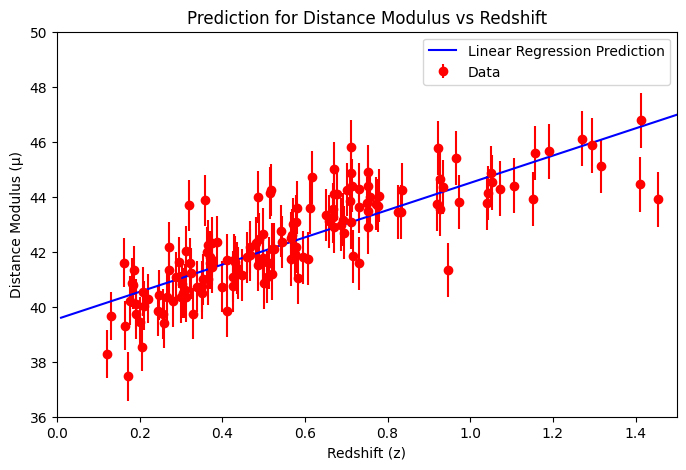

In [37]:
z = np.linspace(0.01, 1.5, 1000)
plot_dist_mod()
# YOUR CODE HERE
X = np.c_[np.ones_like(z), z]
mu_pred_lin = predict_lin_reg(theta, X)  # call the linear regression model
# plot the predicted curve
plt.plot(z, mu_pred_lin, label="Linear Regression Prediction", color="blue")
plt.xlabel("Redshift (z)")
plt.ylabel("Distance Modulus (μ)")
plt.title("Prediction for Distance Modulus vs Redshift")
plt.legend()
# plt.show()

In [38]:
check_var_defined("mu_pred_lin")
assert mu_pred_lin.shape == (len(z),), (
    "Make sure the shape of your predictions is correct"
)

mu_pred_lin defined.


*Solve for the parameters $\theta$ using Scikit-Learn.*

In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
# YOUR CODE HERE
X = z_sample.reshape(-1, 1)
y = mu_sample
lin_reg.fit(X, y)
theta_0 = lin_reg.intercept_
theta_1 = lin_reg.coef_

In [41]:
assert lin_reg.coef_.shape == (1,), (
    "Make sure your features have the right shape, such that we have 1 fitted coefficient"
)
print(
    "Linear regression parameters recovered by scikit-learn: intercept={0:.4f}, slope={1:.4f}".format(
        lin_reg.intercept_, lin_reg.coef_[0]
    )
)

Linear regression parameters recovered by scikit-learn: intercept=39.5505, slope=4.9538


*Extend your model to include polynomial features up to degree 15 (using Scikit-Learn).  Use variable `lin_reg_poly` for your revised model.*

In [43]:
degree = 15
bias = False
from sklearn.preprocessing import PolynomialFeatures


def compute_poly_features(degree, bias):
    # Return polynomial features of samples and class
    # YOUR CODE HERE
    poly_features = PolynomialFeatures(degree=degree, include_bias=bias)
    z_sample_poly = poly_features.fit_transform(X)
    return z_sample_poly, poly_features


z_sample_poly, poly_features = compute_poly_features(degree, bias)
# Train model
# YOUR CODE HERE
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(z_sample_poly, y)

LinearRegression()

In [44]:
check_var_defined("lin_reg_poly")

lin_reg_poly defined.


*Plot the data and the predictions of your models considered so far (linear and polynomial regression).  Call the variable used to store the predictions for your polynomial model `mu_pred_poly`.*

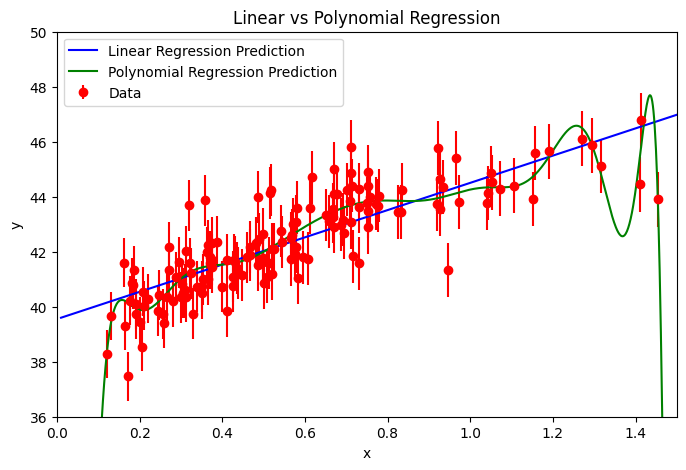

In [46]:
# YOUR CODE HERE
def plot_linear_vs_polynomial():
    z = np.linspace(0.01, 1.5, 1000)
    X_linear = np.c_[np.ones_like(z), z]
    mu_pred_lin = predict_lin_reg(theta, X_linear)
    X_poly = poly_features.transform(z.reshape(-1, 1))
    mu_pred_poly = lin_reg_poly.predict(X_poly)
    plot_dist_mod()
    plt.plot(z, mu_pred_lin, label="Linear Regression Prediction", color="b")
    plt.plot(z, mu_pred_poly, label="Polynomial Regression Prediction", color="g")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Linear vs Polynomial Regression")
    plt.legend()
    return mu_pred_poly


mu_pred_poly = plot_linear_vs_polynomial()

In [47]:
check_var_defined("mu_pred_poly")
assert mu_pred_poly.shape == (len(z),)

mu_pred_poly defined.


*Comment on the accuracy of your models.*

 ### Answer:
The linear regression model underfits the data, as it cannot capture the nonlinear relationship between redshift and distance modulus, resulting in a straight line that deviates from the data points. In contrast, the polynomial regression model accounts for curvature and fits the data more closely, but its high degree causes overfitting by capturing noise rather than the true trend.

*Think about methods that could be used to improve the performance of your models. Improve your polynomial model and use the improved model to make predictions. Call the variable used to store the polynomial model `ridge_reg_poly`. Call the variable used to store the predictions for your polynomial model `mu_pred_poly_improved`.*

In [51]:
# YOUR CODE HERE
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ridge_reg_poly = Pipeline(
    (
        ("poly_features", PolynomialFeatures(degree=15, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("regul_reg", Ridge(alpha=1)),
    )
)

ridge_reg_poly.fit(z_sample.reshape(-1, 1), mu_sample)
mu_pred_poly_improved = ridge_reg_poly.predict(z.reshape(-1, 1))

In [52]:
check_var_defined("ridge_reg_poly")
check_var_defined("mu_pred_poly_improved")
assert mu_pred_poly_improved.shape == (len(z),), (
    "Make sure the shape of your predictions is correct"
)

ridge_reg_poly defined.
mu_pred_poly_improved defined.


*Plot the predictions made with new model and all previous models considered.*

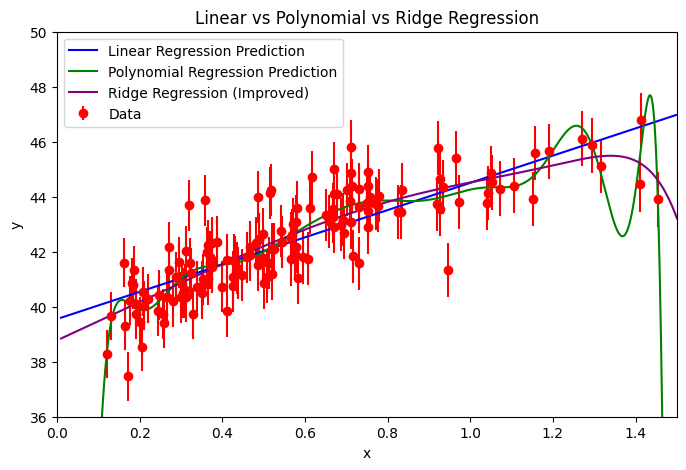

In [54]:
# YOUR CODE HERE
plot_linear_vs_polynomial()
plt.plot(
    z, mu_pred_poly_improved, label="Ridge Regression (Improved)", color="purple"
)  # Ridge model
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear vs Polynomial vs Ridge Regression")
plt.legend()
# plt.show()

*Compute the RMS error between your predictions and the data samples.*

In [56]:
# Define a general function to compute the RMS error
from sklearn.metrics import mean_squared_error


def compute_rms(mu_1, mu_2):
    # YOUR CODE HERE
    return np.sqrt(mean_squared_error(mu_1, mu_2))


In [57]:
assert np.isclose(compute_rms(mu_pred_lin, mu_pred_lin), 0.0)

In [58]:
# Compute the RMS error between the data and the predictions for each model.
# Use variables rms_sample_lin, rms_sample_poly and rms_sample_poly_improved.
# YOUR CODE HERE
X_linear = np.c_[np.ones_like(z_sample), z_sample]
mu_pred_lin_data = predict_lin_reg(theta, X_linear)
X_poly_sample = poly_features.transform(z_sample.reshape(-1, 1))
mu_pred_poly_data = lin_reg_poly.predict(X_poly_sample)
mu_pred_poly_improved_data = ridge_reg_poly.predict(z_sample.reshape(-1, 1))

rms_sample_lin = compute_rms(mu_sample, mu_pred_lin_data)
rms_sample_poly = compute_rms(mu_sample, mu_pred_poly_data)
rms_sample_poly_improved = compute_rms(mu_sample, mu_pred_poly_improved_data)


In [59]:
# Print RMS values computed.
print("rms_sample_lin = {0:.4f}".format(rms_sample_lin))
print("rms_sample_poly = {0:.4f}".format(rms_sample_poly))
print("rms_sample_poly_improved = {0:.4f}".format(rms_sample_poly_improved))

rms_sample_lin = 1.0084
rms_sample_poly = 0.8855
rms_sample_poly_improved = 0.9274


In [60]:
check_var_defined("rms_sample_lin")

rms_sample_lin defined.


In [61]:
check_var_defined("rms_sample_poly")

rms_sample_poly defined.


In [62]:
check_var_defined("rms_sample_poly_improved")

rms_sample_poly_improved defined.


*Comment on what models you believe are best.*

 ### Answer:
believe that Ridge Regression is the best overall choice, even though its RMS is slightly higher than the plain polynomial model. The plain polynomial model appears to overfit (as suggested by the previous plot), so if we look beyond raw RMS on this dataset, the Ridge-regularized model’s better generalization makes it preferable. Of course, if we only consider RMS, the polynomial model comes first, then the RR model.

Using our cosmological concordance model we can predict the theoretical distance modulus vs redshift relationship using our understanding of the physics.

In [66]:
from astroML.cosmology import Cosmology

cosmo = Cosmology()
mu_cosmo = np.array(list(map(cosmo.mu, z)))

        Use astropy.cosmology instead. [warnings]


*Plot the data, predictions made with all regression models, and the values predicted by the cosmological model.*

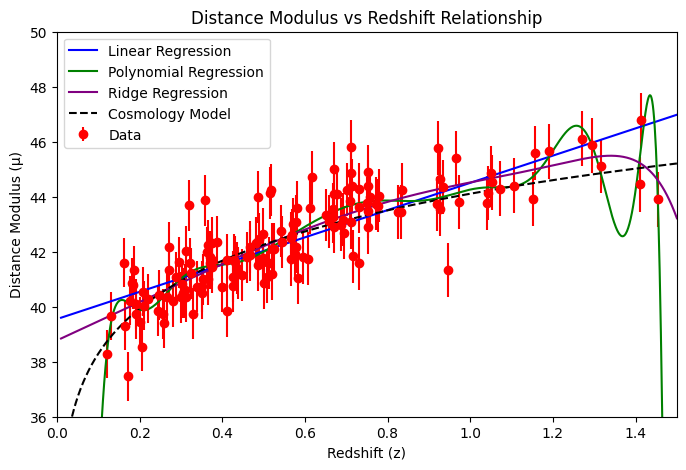

In [68]:
# YOUR CODE HERE

plot_dist_mod()
plt.plot(z, mu_pred_lin, color="b", label="Linear Regression")
plt.plot(z, mu_pred_poly, color="g", label="Polynomial Regression")
plt.plot(z, mu_pred_poly_improved, color="purple", label="Ridge Regression")
plt.plot(z, mu_cosmo, color="black", linestyle="--", label="Cosmology Model")

plt.xlabel("Redshift (z)")
plt.ylabel("Distance Modulus (µ)")
plt.title("Distance Modulus vs Redshift Relationship")
plt.legend()
# plt.show()


*Compute the RMS error between the predictions made by the cosmological model and each of the regression models, over the sample array `z`.*

In [70]:
# Compute the RMS error between the data and the predictions for each model.
# Use variables rms_cosmo_lin, rms_cosmo_poly and rms_cosmo_poly_improved.
# YOUR CODE HERE
rms_cosmo_lin = compute_rms(mu_cosmo, mu_pred_lin)
rms_cosmo_poly = compute_rms(mu_cosmo, mu_pred_poly)
rms_cosmo_poly_improved = compute_rms(mu_cosmo, mu_pred_poly_improved)


In [71]:
# Print RMS values computed.
print("rms_cosmo_lin = {0:.4f}".format(rms_cosmo_lin))
print("rms_cosmo_poly = {0:.4f}".format(rms_cosmo_poly))
print("rms_cosmo_poly_improved = {0:.4f}".format(rms_cosmo_poly_improved))

rms_cosmo_lin = 1.1252
rms_cosmo_poly = 20.6649
rms_cosmo_poly_improved = 0.8183


In [72]:
check_var_defined("rms_cosmo_lin")

rms_cosmo_lin defined.


In [73]:
check_var_defined("rms_cosmo_poly")

rms_cosmo_poly defined.


In [74]:
check_var_defined("rms_cosmo_poly_improved")

rms_cosmo_poly_improved defined.


*Comment on the RMS values computed and the implications for the accuracy of the different regression models considered.*

### Answer
The plain polynomial model’s high RMS error tells us that its predictions are far off from what the cosmological model suggests it’s like it's taking a completely different route, likely because it's overfitting to the noise in the data. In contrast, the linear model has a lower RMS error, indicating that it follows the general trend of the cosmological model more closely. Overall, the Ridge regression model shows the lowest RMS error, meaning that by controlling overfitting through regularization, it captures the true underlying trend much better than the other models.

---

## Part 2: Classification

In these exercises we will consider classification of [RR Lyrae](https://en.wikipedia.org/wiki/RR_Lyrae_variable) variable stars.  RR Lyrae variables are often used as standard candles to measure astronomical distances since their period of pulsation can be related to their absolute magnitude.

Observations of star magnitudes are made in each [SDSS filter band](http://skyserver.sdss.org/dr2/en/proj/advanced/color/sdssfilters.asp): u, g, r, i, z.

We will consider the space of astronomical "colours" to distinguish RR Lyraes from background stars.  Astronomical colours are simply differences in magnitudes between bands, e.g. u-g, g-r, r-i, i-z.  You can find further background [here](https://en.wikipedia.org/wiki/Color%E2%80%93color_diagram).

First, download the data.  (This may take some time on first execution.  Subsequently executions will read from cached data on your system.)

In [81]:
# Load data
from astroML.datasets import fetch_rrlyrae_combined

X, y = fetch_rrlyrae_combined()

You can learn more about the format of the returned data [here](http://www.astroml.org/modules/generated/astroML.datasets.fetch_rrlyrae_combined.html).  In particular, note that the columns of `X` are u-g, g-r, r-i, i-z.

*Construct a Pandas DataFrame for the `X` data and a Series for the `y` data.  Call your Pandas objects `X_pd` and `y_pd` respectively.*

Be sure to give your colums the correct colour name, e.g. 'u-g'.

In [84]:
import pandas as pd

cols = ["u-g", "g-r", "r-i", "i-z"]
# YOUR CODE HERE
X_pd = pd.DataFrame(X, columns=["u-g", "g-r", "r-i", "i-z"])

In [85]:
check_var_defined("X_pd")
print(X_pd)

X_pd defined.
            u-g       g-r       r-i       i-z
0      1.250999  0.394000  0.137000  0.061999
1      1.048000  0.339001  0.151999  0.023001
2      1.008001  0.341999  0.129000  0.203001
3      0.965000  0.392000  0.149000  0.150000
4      1.040001  0.333000  0.125999  0.101999
...         ...       ...       ...       ...
93136  0.962999  0.059000 -0.025999 -0.025000
93137  1.059999  0.185001  0.050999 -0.023998
93138  1.044001  0.212000  0.035000  0.002001
93139  1.064999  0.172001  0.042000  0.003000
93140  1.125999  0.065001 -0.017000 -0.057999

[93141 rows x 4 columns]


In [86]:
# YOUR CODE HERE
y_pd = pd.Series(y, name="label")

In [87]:
check_var_defined("y_pd")
print(y_pd)

y_pd defined.
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
93136    1.0
93137    1.0
93138    1.0
93139    1.0
93140    1.0
Name: label, Length: 93141, dtype: float64


*Combine your data and targets into a single Pandas DataFrame, labelling the target column 'target'.  Call the resulting Pandas DataFrame `X_pd_all`.*

In [89]:
# YOUR CODE HERE
X_pd_all = pd.DataFrame(X, columns=["u-g", "g-r", "r-i", "i-z"])
X_pd_all["target"] = y

In [90]:
check_var_defined("X_pd_all")
print(X_pd_all)

X_pd_all defined.
            u-g       g-r       r-i       i-z  target
0      1.250999  0.394000  0.137000  0.061999     0.0
1      1.048000  0.339001  0.151999  0.023001     0.0
2      1.008001  0.341999  0.129000  0.203001     0.0
3      0.965000  0.392000  0.149000  0.150000     0.0
4      1.040001  0.333000  0.125999  0.101999     0.0
...         ...       ...       ...       ...     ...
93136  0.962999  0.059000 -0.025999 -0.025000     1.0
93137  1.059999  0.185001  0.050999 -0.023998     1.0
93138  1.044001  0.212000  0.035000  0.002001     1.0
93139  1.064999  0.172001  0.042000  0.003000     1.0
93140  1.125999  0.065001 -0.017000 -0.057999     1.0

[93141 rows x 5 columns]


*Add a 'target description' column to your existing `X_pd_all` DataFrame, with fields 'Background' and 'RR Lyrae' to specify the target type.*

In [92]:
# YOUR CODE HERE
X_pd_all["target description"] = np.where(
    X_pd_all["target"] == 1, "RR Lyrae", "Background"
)

In [93]:
print(X_pd_all)

            u-g       g-r       r-i       i-z  target target description
0      1.250999  0.394000  0.137000  0.061999     0.0         Background
1      1.048000  0.339001  0.151999  0.023001     0.0         Background
2      1.008001  0.341999  0.129000  0.203001     0.0         Background
3      0.965000  0.392000  0.149000  0.150000     0.0         Background
4      1.040001  0.333000  0.125999  0.101999     0.0         Background
...         ...       ...       ...       ...     ...                ...
93136  0.962999  0.059000 -0.025999 -0.025000     1.0           RR Lyrae
93137  1.059999  0.185001  0.050999 -0.023998     1.0           RR Lyrae
93138  1.044001  0.212000  0.035000  0.002001     1.0           RR Lyrae
93139  1.064999  0.172001  0.042000  0.003000     1.0           RR Lyrae
93140  1.125999  0.065001 -0.017000 -0.057999     1.0           RR Lyrae

[93141 rows x 6 columns]


*How many RR Lyrae variable stars are there in the dataset (i.e compute `n_rrlyrae`)?*

In [95]:
# YOUR CODE HERE
counts = X_pd_all["target description"].value_counts()
n_rrlyrae = counts["RR Lyrae"]

In [96]:
check_var_defined("n_rrlyrae")
print("n_rrlyrae = {0}".format(n_rrlyrae))

n_rrlyrae defined.
n_rrlyrae = 483


*How many background stars are there in the dataset (i.e. compute `n_background`)?*

In [98]:
# YOUR CODE HERE
n_background = counts["Background"]

In [99]:
check_var_defined("n_background")
print("n_background = {0}".format(n_background))

n_background defined.
n_background = 92658


*Plot scatter plot pairs for all colour combinations using `seaborn`.  Colour the points by target type. Make sure the distribution plots are normalised to have an area of 1 under the curve for each of the classes.*

In [101]:
%matplotlib inline
import seaborn as sns

sns.set()

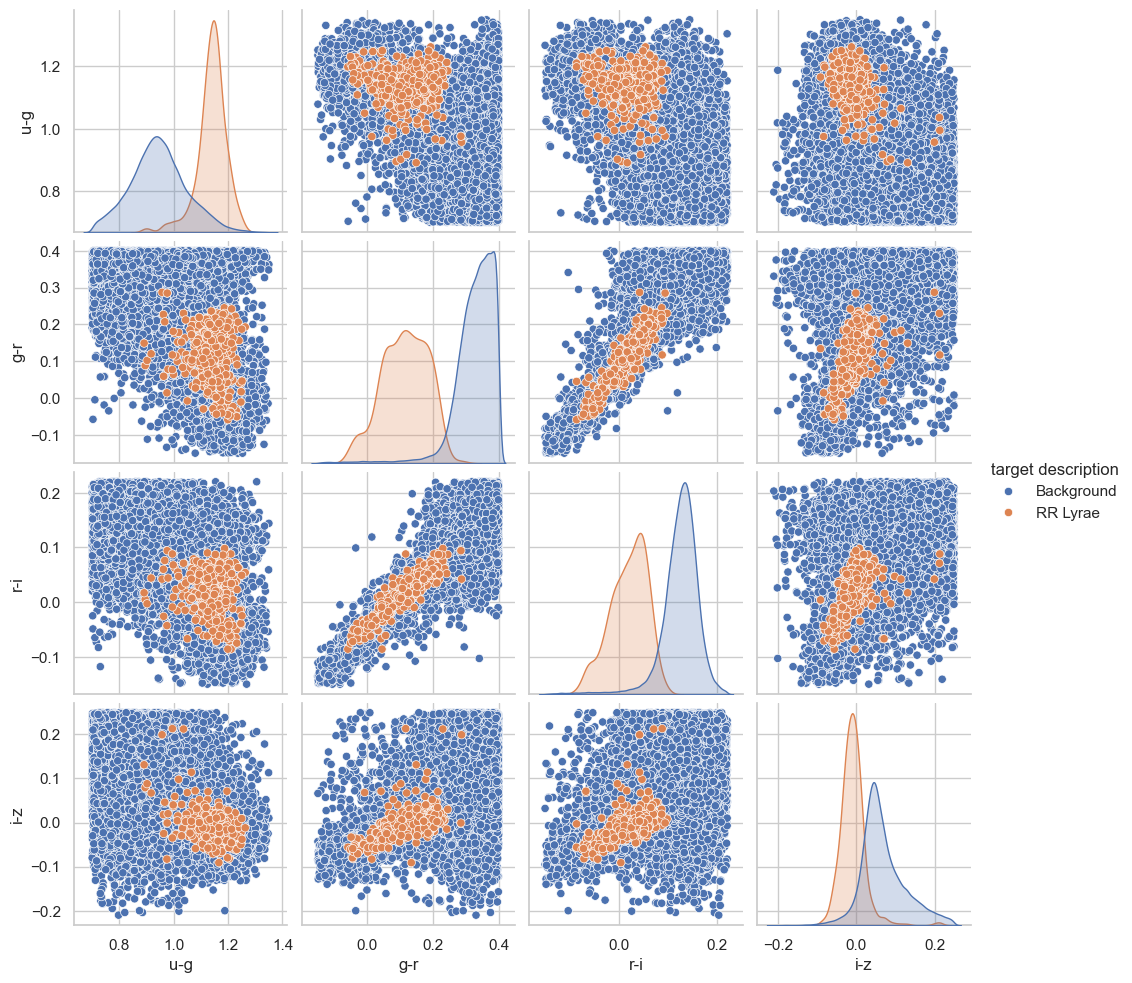

In [102]:
# YOUR CODE HERE
sns.set(style="whitegrid")

g = sns.pairplot(
    data=X_pd_all,
    vars=["u-g", "g-r", "r-i", "i-z"],
    hue="target description",
    diag_kind="kde",
    diag_kws={"common_norm": False},
)

# plt.show()

Let's separate the data into training and test sets, keeping 25% of the data for testing.  

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=1
)

First let's consider 1D classification for the zeroth colour, i.e. $u-g$. 

In [106]:
ind = 0
col = cols[ind]
col

'u-g'

In [107]:
X_train_1d = X_train[:, ind]
X_train_1d = X_train_1d.reshape(-1, 1)
X_test_1d = X_test[:, ind]
X_test_1d = X_test_1d.reshape(-1, 1)

To get some further intuition about the 1D classiciation problem consider a 1D plot of
class against colour.

In [109]:
def plot_scatter():
    plt.figure(figsize=(10, 5))
    plt.scatter(
        X_train_1d[y_train == 1],
        y_train[y_train == 1],
        c="m",
        marker="^",
        label="RR Lyrae",
    )
    plt.scatter(
        X_train_1d[y_train == 0],
        y_train[y_train == 0],
        c="c",
        marker="v",
        label="Background",
    )
    plt.xlabel("$" + col + "$")
    plt.ylabel("Probability of type RR Lyrae")


plot_scatter()
plt.legend()

*Given the plot shown above, comment on how well you expect logistic regression to perform.*

### Answer: 
Logistic regression is expected to perform effectively since the two classes exhibit clear separation, allowing for an effective decision boundary

*Where would you guess the decision bounary should lie?  Set the variable `decision_boundary_guess` to your guess.*

In [113]:
# YOUR CODE HERE
decision_boundary_guess = 1.0

In [114]:
check_var_defined("decision_boundary_guess")
print("decision_boundary_guess = {0:.4f}".format(decision_boundary_guess))

decision_boundary_guess defined.
decision_boundary_guess = 1.0000


Use Scikit-Learn to perform logistic regression to classify the two classes for this 1D problem.

First, set the inverse regularation strength `C` such that regularisation is effecitvely not performed.

In [117]:
C = 1e10

*Second, fit the model using Scikit-Learn. Use the variable `clf` for your classification model.*

In [119]:
from sklearn.linear_model import LogisticRegression

# YOUR CODE HERE
clf = LogisticRegression(C=1e10, solver="lbfgs")
clf.fit(X_train_1d, y_train)

LogisticRegression(C=10000000000.0)

In [120]:
check_var_defined("clf")

clf defined.


*Compute the decision boundary of the logistic regression model fitted by Scikit-Learn.  User variable `decision_boundary_sklearn` for your result.*

(Ensure your result is a scalar and not an array of length 1.)

In [122]:
# YOUR CODE HERE
w0 = clf.intercept_[0]
w1 = clf.coef_[0][0]

decision_boundary_sklearn = -w0 / w1

In [123]:
assert not hasattr(decision_boundary_sklearn, "__len__")
print("decision_boundary_sklearn = {0:.4f}".format(decision_boundary_sklearn))

decision_boundary_sklearn = 1.3697


*Evaluate the probabilities predicted by your logistic regression model over the domain specified by the variable `X_1d_new`. Use variable `y_1d_proba` for your computed probabilities.*

In [125]:
X_1d_new = np.linspace(0.3, 2.0, 1000).reshape(-1, 1)
# YOUR CODE HERE
y_1d_proba = clf.predict_proba(X_1d_new)

In [126]:
check_var_defined("y_1d_proba")

y_1d_proba defined.


*Plot the probability of a star being of type RR Lyrae against the colour variable considered.  Also plot the probability of being a Background star.  Overlay these plots on the scatter plot of class types.  Also plot the decision boundary that you guessed previously and the one computed by Scikit-Learn.*

In [128]:
plot_scatter()


# YOUR CODE HERE
def prob_plot():
    plt.plot(X_1d_new, y_1d_proba[:, 1], "b-", label="P(RR Lyrae)", linewidth=2)
    plt.plot(X_1d_new, y_1d_proba[:, 0], "g-", label="P(Background)", linewidth=2)

    plt.axvline(
        x=decision_boundary_sklearn,
        color="red",
        linestyle="--",
        label="Decision Boundary",
    )
    plt.axvline(
        x=decision_boundary_guess,
        color="purple",
        linestyle="--",
        label="Guessed Decision Boundary",
    )

    plt.xlabel("Feature")
    plt.ylabel("Probability")
    plt.title("Class Probability vs Colour Variable")

    handles, labels = plt.gca().get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    plt.legend(unique_labels.values(), unique_labels.keys(), loc="best")


prob_plot()
# plt.show()

*From inspection of your plot, how would all objects in the training set be classified?*

### Answer:
Any object which is on the left of the dashed red line would be classified as background, and any object on the right side of the red line would be classified as RR Lyrae

*Use your logistic regression model fitted by Scikit-Learn to predict the class of all objects in the test set. Use variable `y_test_1d_pred` to specify your answer.*

In [132]:
# YOUR CODE HERE
y_test_1d_pred = clf.predict(X_test_1d)

In [133]:
check_var_defined("y_test_1d_pred")

y_test_1d_pred defined.


*How many objects are classified as of type RR Lyrae?  Use variable `n_rrlyrae_pred` to specify your answer.*

In [135]:
# YOUR CODE HERE
n_rrlyrae_pred = (y_test_1d_pred == 1).sum()


In [136]:
check_var_defined("n_rrlyrae_pred")
assert n_rrlyrae_pred % 1 == 0  # check integer
print("n_rrlyrae_pred = {0}".format(n_rrlyrae_pred))

n_rrlyrae_pred defined.
n_rrlyrae_pred = 0


*How many objects are classified as of type Background?  Use variable `n_background_pred` to specify your answer.*

In [138]:
# YOUR CODE HERE
n_background_pred = (y_test_1d_pred == 0).sum()

In [139]:
check_var_defined("n_background_pred")
assert n_background_pred % 1 == 0  # check integer
print("n_background_pred = {0}".format(n_background_pred))

n_background_pred defined.
n_background_pred = 23286


Let's check the Scikit-Learn result by solving the logistic regression problem (without regularisation) manually.

Recall that the cost function for logistic regression is given by
$$
C(\theta) = -\frac{1}{m} \sum_{i=1}^m 
\left [ 
y^{(i)} \log(\hat{p}^{(i)})
+
(1 - y^{(i)}) \log(1 - \hat{p}^{(i)})
\right],
$$


where

$$\hat{p} = \sigma(\theta^\text{T} x) = \frac{1}{1+\exp{(-\theta^\text{T} x)}}. $$

Show analytically that the derivative of the cost function is given by
$$\begin{eqnarray}
\frac{\partial C}{\partial \theta} 
&=& 
\frac{1}{m} \sum_{i=1}^m 
\left[ \sigma\left(\theta^{\rm T} x^{(i)} \right) - y^{(i)} \right]
x^{(i)}\\
&=&
\frac{1}{m} 
X^{\rm T}
\left[ \sigma\left(X \theta \right) - y \right]
\end{eqnarray}$$

(use latex mathematics expressions).

*First, simplify the cost function terms $\log(\hat{p})$ and $\log(1-\hat{p})$ to express in terms linear in $\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$.*

(You may drop $i$ superscripts for notational brevity.)

$$
\log(\hat{p}) = -\log\bigl(1 + e^{-\theta^T x}\bigr), \quad
\log\bigl(1 - \hat{p}\bigr)
= -\,\theta^T x \;-\; \log\bigl(1 + e^{-\theta^T x}\bigr).
$$


*Next, substitute these terms into the cost function and simplify to also express the cost function in terms linear in $\log\left({1+{\rm e}^{-\theta^{\rm T}x}}\right)$.*

$$
C(\theta) 
= \frac{1}{m} \sum_{i=1}^m 
\Bigl[
  \log\bigl(1 + e^{-\theta^T x^{(i)}}\bigr)
  + \bigl(1 - y^{(i)}\bigr)\,\theta^T x^{(i)}
\Bigr].
$$


*Now compute the derivative of the cost function with respect to variable $\theta_j$, i.e. compute $\partial C / \partial \theta_j$.*

$$
\frac{\partial C}{\partial \theta_j}
= \frac{1}{m} \sum_{i=1}^m 
\bigl(\hat{p}^{(i)} - y^{(i)}\bigr)\,x_j^{(i)}.
$$


*Combine terms for all $\theta_j$ to give the overall derivative with respect to $\theta$, i.e. $\partial C / \partial \theta$.*

$$
\nabla_{\theta} C(\theta) 
= \frac{1}{m} \, X^T \bigl(\hat{p} - y\bigr).
$$


Using the analytically expression for the derivative of the cost function, we will solve the logistic regression problem by implementing a gradient descent algorithm.

*First, define the sigmoid function.*

In [153]:
def sigmoid(x):
    # YOUR CODE HERE
    return 1 / (1 + np.exp(-x))

In [154]:
assert np.isclose(sigmoid(0), 0.5)

*Next, extend the training data to account for a bias term in your model. Use variable `X_train_1d_b` to specify your result.*

In [156]:
# YOUR CODE HERE
X_train_1d_b = np.c_[np.ones((X_train_1d.shape[0], 1)), X_train_1d]

In [157]:
check_var_defined("X_train_1d_b")

X_train_1d_b defined.


*Implement batch gradient descent to fit the parameters of your logistic regression model.  Consider `n_iterations = 4000` iterations and a learning rate of `alpha = 100.0`. Consider a starting point of $\theta_0 = (1, 1)$, i.e. `theta = np.array([[1], [1]])`. Use variable `theta` to specify your estimated parameters.*

*(Make sure your implementation is reasonably efficient. If it takes longer than 2 minutes to execute when running on our server it may not complete and you will not be awarded grades. The solution answer runs in under 10 seconds.)*

In [159]:
n_iterations = 4000
alpha = 100.0
theta = np.array([[1], [1]])
# YOUR CODE HERE
m = X_train_1d_b.shape[0]

for iter in range(n_iterations):
    z = X_train_1d_b @ theta
    h = sigmoid(z)

    # Compute the gradient: gradient = (1/m) * X^T (h - y)  (shape: (2,1))
    gradient = (X_train_1d_b.T @ (h - y_train.reshape(-1, 1))) / m

    # 5) Update theta
    theta = theta - alpha * gradient


In [160]:
check_var_defined("theta")
print("theta[0] = {0:.4f}".format(theta[0][0]))
print("theta[1] = {0:.4f}".format(theta[1][0]))

theta defined.
theta[0] = -21.7012
theta[1] = 15.8177


*Compute the difference between the logistic regression model intercept computed by Scikit-Learn and manually.  Use variable `intercept_diff` for your result.*

In [162]:
# YOUR CODE HERE
intercept_diff = clf.intercept_[0] - theta[0, 0]

In [163]:
check_var_defined("intercept_diff")
print("intercept_diff = {0:.4E}".format(intercept_diff))

intercept_diff defined.
intercept_diff = -7.9368E-02


*Compute the difference between the logistic regression model* slope *(i.e. coefficient) computed by Scikit-Learn and manually.  Use variable `coeff_diff` for your result.*

In [165]:
# YOUR CODE HERE
coeff_diff = clf.coef_[0, 0] - theta[1, 0]

In [166]:
check_var_defined("coeff_diff")
print("coeff_diff = {0:.4E}".format(coeff_diff))

coeff_diff defined.
coeff_diff = 8.4554E-02


You should find that the solution from your gradient descent algorithm is close (although not identical) to that recovered by Scikit-Learn. 

Both fitted logistic regression models, however, are not effective. The reason for this is because of class imbalance.  *Describe the class imbalance problem in your own words and how it manifests itself in the classification problem at hand.*

### Answer:
In our case, because most of the objects are background, the logistic regression model minimizes its error by predicting almost everything as background. This approach reduces the overall error but fails to identify the rare RR Lyrae objects. Consequently, even if the model shows high overall accuracy, its performance is poor for the minority class, which is critical for our classification problem.

The class imbalance problem can be addressed by weighting the training data in a manner that is inversely proportional to their frequency.

*Repeat the fitting of your linear regression model but this time perform class weighting.  Use variable `clf_balanced` for your new model.*

See the `class_weight` argument of the Scikit-Learn [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier for further details on how to perform class weighting.

In [171]:
from sklearn.linear_model import LogisticRegression

# YOUR CODE HERE
clf_balanced = LogisticRegression(C=1e10, solver="lbfgs", class_weight="balanced")
clf_balanced.fit(X_train_1d, y_train)

LogisticRegression(C=10000000000.0, class_weight='balanced')

In [172]:
check_var_defined("clf_balanced")

clf_balanced defined.


*Compute the decision boundary of the logistic regression model fitted by Scikit-Learn when weighting classes.* 

(Ensure your result is a scalar and not an array of length 1.)

In [174]:
# YOUR CODE HERE
w0_balanced = clf_balanced.intercept_[0]
w1_balanced = clf_balanced.coef_[0, 0]
decision_boundary_sklearn_balanced = -w0_balanced / w1_balanced

In [175]:
check_var_defined("decision_boundary_sklearn_balanced")
assert not hasattr(decision_boundary_sklearn_balanced, "__len__")
print(
    "decision_boundary_sklearn_balanced = {0:.4f}".format(
        decision_boundary_sklearn_balanced
    )
)

decision_boundary_sklearn_balanced defined.
decision_boundary_sklearn_balanced = 1.0597


*Evaluate the probabilities prediced by your new logistic regression model over the domain specified by the variable `X_1d_new`. Use variable `y_1d_proba_balanced` for your computed probabilities.*

In [177]:
# YOUR CODE HERE
y_1d_proba_balanced = clf_balanced.predict_proba(X_1d_new)

In [178]:
check_var_defined("y_1d_proba_balanced")

y_1d_proba_balanced defined.


*For your new balanced model, plot the probability of a star being of type RR Lyrae against the colour variable considered.  Also plot the probability of being a Background star.  Overlay these plots on the scatter plot of class types.  Also plot the decision boundary that you guessed previously, the one computed by Scikit-Learn initially, and the one computed by Scikit-Learn for your new balanced model.*

In [180]:
plot_scatter()
# YOUR CODE HERE
prob_plot()
plt.plot(
    X_1d_new,
    y_1d_proba_balanced[:, 1],
    "cyan",
    label="P(RR Lyrae) balanced",
    linewidth=2,
)
plt.plot(
    X_1d_new,
    y_1d_proba_balanced[:, 0],
    "orange",
    label="P(Background) balanced",
    linewidth=2,
)

plt.axvline(
    x=decision_boundary_sklearn_balanced,
    color="black",
    linestyle="--",
    label="Balanced Decision Boundary",
)

plt.legend()
# plt.show()

*Comment on the decision boundary of the balanced model compared to the unbalanced models fitted previously.*

### Answer:
In the balanced model, the decision boundary adjusts to increase the likelihood of classifying objects as RR Lyrae rather than defaulting to the background class. Unlike unbalanced models, which tend to favor the majority class (background)

Now that we've built up good intuition surrounding the subtleties of the classification problem at hand in 1D, let's consider the 2D problem (we will keep to 2D for plotting convenience).

For the 2D case we consider the following colours.

In [185]:
ind = 1
cols[: ind + 1]

['u-g', 'g-r']

Consider the following training and test data for the 2D problem.

In [187]:
X_train_2d = X_train[:, : ind + 1]
X_train_2d = X_train_2d.reshape(-1, ind + 1)
X_test_2d = X_test[:, : ind + 1]
X_test_2d = X_test_2d.reshape(-1, ind + 1)

*Train a logistic regression model for this 2D problem.  Use variable `clf_2d_logistic` for your classifier.*

In [189]:
# YOUR CODE HERE
clf_2d_logistic = LogisticRegression(C=1e10, solver="lbfgs", class_weight="balanced")
clf_2d_logistic.fit(X_train_2d, y_train)

LogisticRegression(C=10000000000.0, class_weight='balanced')

In [190]:
check_var_defined("clf_2d_logistic")

clf_2d_logistic defined.


*Compute the precision and recall of your 2D logistic regression model. Use variables `precision_logistic` and `recall_logistic` for your results.*

In [192]:
# YOUR CODE HERE
from sklearn.metrics import precision_score, recall_score

y_pred_2d = clf_2d_logistic.predict(X_test_2d)
precision_logistic = precision_score(y_test, y_pred_2d)
recall_logistic = recall_score(y_test, y_pred_2d)

In [193]:
check_var_defined("precision_logistic")
print("precision_logistic = {0:.6f}".format(precision_logistic))

precision_logistic defined.
precision_logistic = 0.137255


In [194]:
check_var_defined("recall_logistic")
print("recall_logistic = {0:.6f}".format(recall_logistic))

recall_logistic defined.
recall_logistic = 0.992126


Consider the following meshgrid defining the u-g and g-r colour domain of interest.

In [196]:
xlim = (0.7, 1.45)  # u-g
ylim = (-0.15, 0.4)  # g-r
xx, yy = np.meshgrid(
    np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100)
)

*Over the domain specified above plot the predicted classification probability.  Overlay on your plot the data instances, highlighting whether a RR Lyrae or background star, and the decision boundary.*

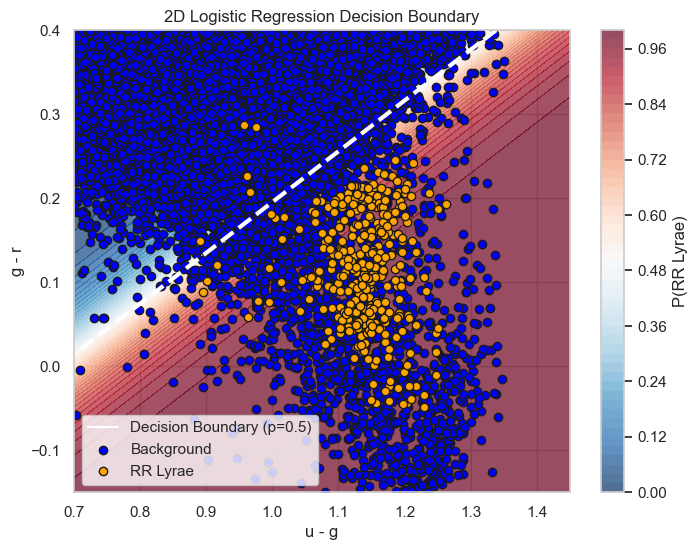

In [317]:
# YOUR CODE HERE
plt.figure(figsize=(8, 6))
X_grid = np.c_[xx.ravel(), yy.ravel()]
y_proba = clf_2d_logistic.predict_proba(X_grid)[:, 1]
Z = y_proba.reshape(xx.shape)
contourf = plt.contourf(xx, yy, Z, levels=50, cmap="RdBu_r", alpha=0.7)
plt.colorbar(contourf, label="P(RR Lyrae)")

decision_boundary = plt.contour(
    xx, yy, Z, levels=[0.5], colors="w", linestyles="--", linewidths=3
)
plt.plot([], [], "white", label="Decision Boundary (p=0.5)")  # for the legend
plt.scatter(
    X_train_2d[y_train == 0, 0],
    X_train_2d[y_train == 0, 1],
    c="blue",
    label="Background",
    edgecolor="k",
)
plt.scatter(
    X_train_2d[y_train == 1, 0],
    X_train_2d[y_train == 1, 1],
    c="orange",
    label="RR Lyrae",
    edgecolor="k",
)

plt.xlabel("u - g")
plt.ylabel("g - r")
plt.title("2D Logistic Regression Decision Boundary")
plt.legend()
# plt.show()

*Now train an SVM classifier that can support a non-linear decision boundary on the same problem. Use the variable `clf_2d_svm` for your model.*

In [200]:
# YOUR CODE HERE
from sklearn.svm import SVC

clf_2d_svm = SVC(
    kernel="rbf", C=1.0, gamma="scale", class_weight="balanced", random_state=42
)
clf_2d_svm.fit(X_train_2d, y_train)

SVC(class_weight='balanced', random_state=42)

In [201]:
check_var_defined("clf_2d_svm")

clf_2d_svm defined.


*Replicate for the SVM your plot above for the 2D logistic regression model.  Over the domain specified above plot the decision function score.  Overlay on your plot the data instances, highlighting whether a RR Lyrae or background star, and the decision boundary.*

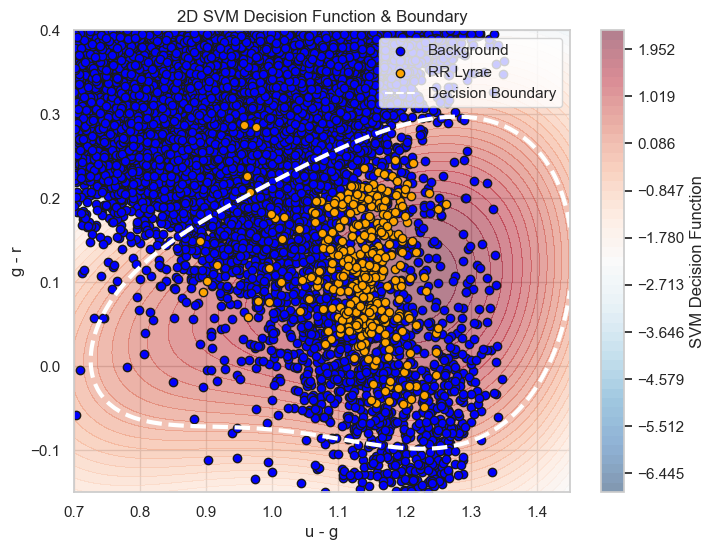

In [203]:
# YOUR CODE HERE
Z = clf_2d_svm.decision_function(X_grid)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
levels = np.linspace(Z.min(), Z.max(), 50)
contourf = plt.contourf(xx, yy, Z, levels=levels, cmap="RdBu_r", alpha=0.5)
plt.colorbar(contourf, label="SVM Decision Function")

boundary = plt.contour(xx, yy, Z, levels=[0], colors="w", linestyles="--", linewidths=3)


plt.scatter(
    X_train_2d[y_train == 0, 0],
    X_train_2d[y_train == 0, 1],
    c="blue",
    label="Background",
    edgecolor="k",
)
plt.scatter(
    X_train_2d[y_train == 1, 0],
    X_train_2d[y_train == 1, 1],
    c="orange",
    label="RR Lyrae",
    edgecolor="k",
)

plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("u - g")
plt.ylabel("g - r")
plt.title("2D SVM Decision Function & Boundary")
plt.plot([], [], "w--", label="Decision Boundary")
plt.legend(loc="upper right")
# plt.show()

*Compute the precision and recall of your 2D SVM model. Use variables `precision_svm` and `recall_svm` for your results.*

In [205]:
# YOUR CODE HERE
y_pred_2d_svm = clf_2d_svm.predict(X_test_2d)

precision_svm = precision_score(y_test, y_pred_2d_svm)
recall_svm = recall_score(y_test, y_pred_2d_svm)

In [206]:
check_var_defined("precision_svm")
print("precision_svm = {0:.6f}".format(precision_svm))

precision_svm defined.
precision_svm = 0.132154


In [207]:
check_var_defined("recall_svm")
print("recall_svm = {0:.6f}".format(recall_svm))

recall_svm defined.
recall_svm = 1.000000


*Comment on the difference in decision boundary between your logistic regression and SVM models and how this impacts the effectiveness of the models.*

### Answer:
Logistic regression's boundary represents a straight, linear line that leaves many RR Lyrae points on the background side, reflecting the limitations of a linear model in capturing complex data distributions. In contrast, SVM's boundary has a more flexible curve that accounts for more RR Lyrae points. While the latter can better enclose clusters of minority class points, this added flexibility can also increase the risk of misclassifying some background points. Overall, the linear model's simplicity may result in lower performance when the true separation is non-linear, whereas the SVM's adaptability can yield improved effectiveness in such scenarios